# Scoring

In [2]:
import pandas as pd
import numpy as np
from trackml.dataset import load_event
import seaborn as sns
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")


# Path to events data
path2data = '/home/alepfu/Desktop/dataset/train_100_events/'

# Event filename prefix
event_id = 'event000001000'

# Load dataset
hits, cells, particles, truth = load_event(path2data + event_id)

# Merge hits, particles and truth
data = pd.merge(pd.merge(truth, pd.DataFrame(hits), on = ['hit_id']), pd.DataFrame(particles), on = ['particle_id'])

In [4]:
from trackml.randomize import shuffle_hits
from trackml.score import score_event

shuffled = shuffle_hits(truth, 0.5) # 50% probability to reassign a hit
score = score_event(truth, shuffled)
score

0.177746296880315

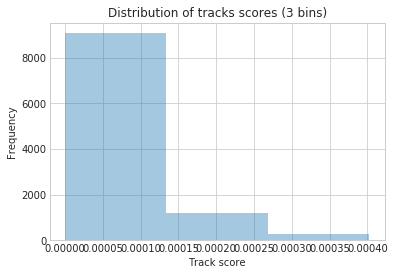

Bins:  [0.         0.0001342  0.00026839 0.00040259]
Bin means:  [7.48550487e-05 1.98850295e-04 3.21430907e-04]
Bin labels:  [1 2 3]


In [69]:
%matplotlib inline

# Get score for each track
particle_score = data.groupby('particle_id').agg({'weight':'sum'}).reset_index()
particle_score.rename(columns={'weight': 'score'}, inplace=True)

# Plot histogram for a low number of bins
N_bins = 3
ax = sns.distplot(particle_score.score.values, bins=N_bins, kde=False);
ax.set_ylabel('Frequency')
ax.set_xlabel('Track score')
ax.set_title('Distribution of tracks scores (%d bins)' % (N_bins))
plt.show()

# Get bin ranges and means
from scipy.stats import binned_statistic
bin_means, bin_edges, binnumber = binned_statistic(particle_score.score.values, particle_score.score.values, bins=N_bins, statistic='mean')
print("Bins: ", bin_edges)
print("Bin means: ", bin_means)
print("Bin labels: ", np.unique(binnumber))
# Append the bin label to the dataframe
particle_score['score_bin'] = binnumber



In [90]:
data_score = pd.merge(data, particle_score, on = ['particle_id'])
data_score = data_score.loc[:, ["hit_id", "particle_id", "x", "y", "z", "score", "score_bin", "nhits"]]
data_score.head()

,hit_id,particle_id,x,y,z,score,score_bin,nhits
0,2,22525763437723648,-55.336102,0.635342,-1502.5,0.00009,1,10
1,1420,22525763437723648,-55.162201,0.604841,-1497.5,0.00009,1,10
2,1460,22525763437723648,-47.975498,0.311848,-1302.5,0.00009,1,10
3,3170,22525763437723648,-47.812302,0.327322,-1297.5,0.00009,1,10
4,3234,22525763437723648,-40.622799,0.088046,-1102.5,0.00009,1,10


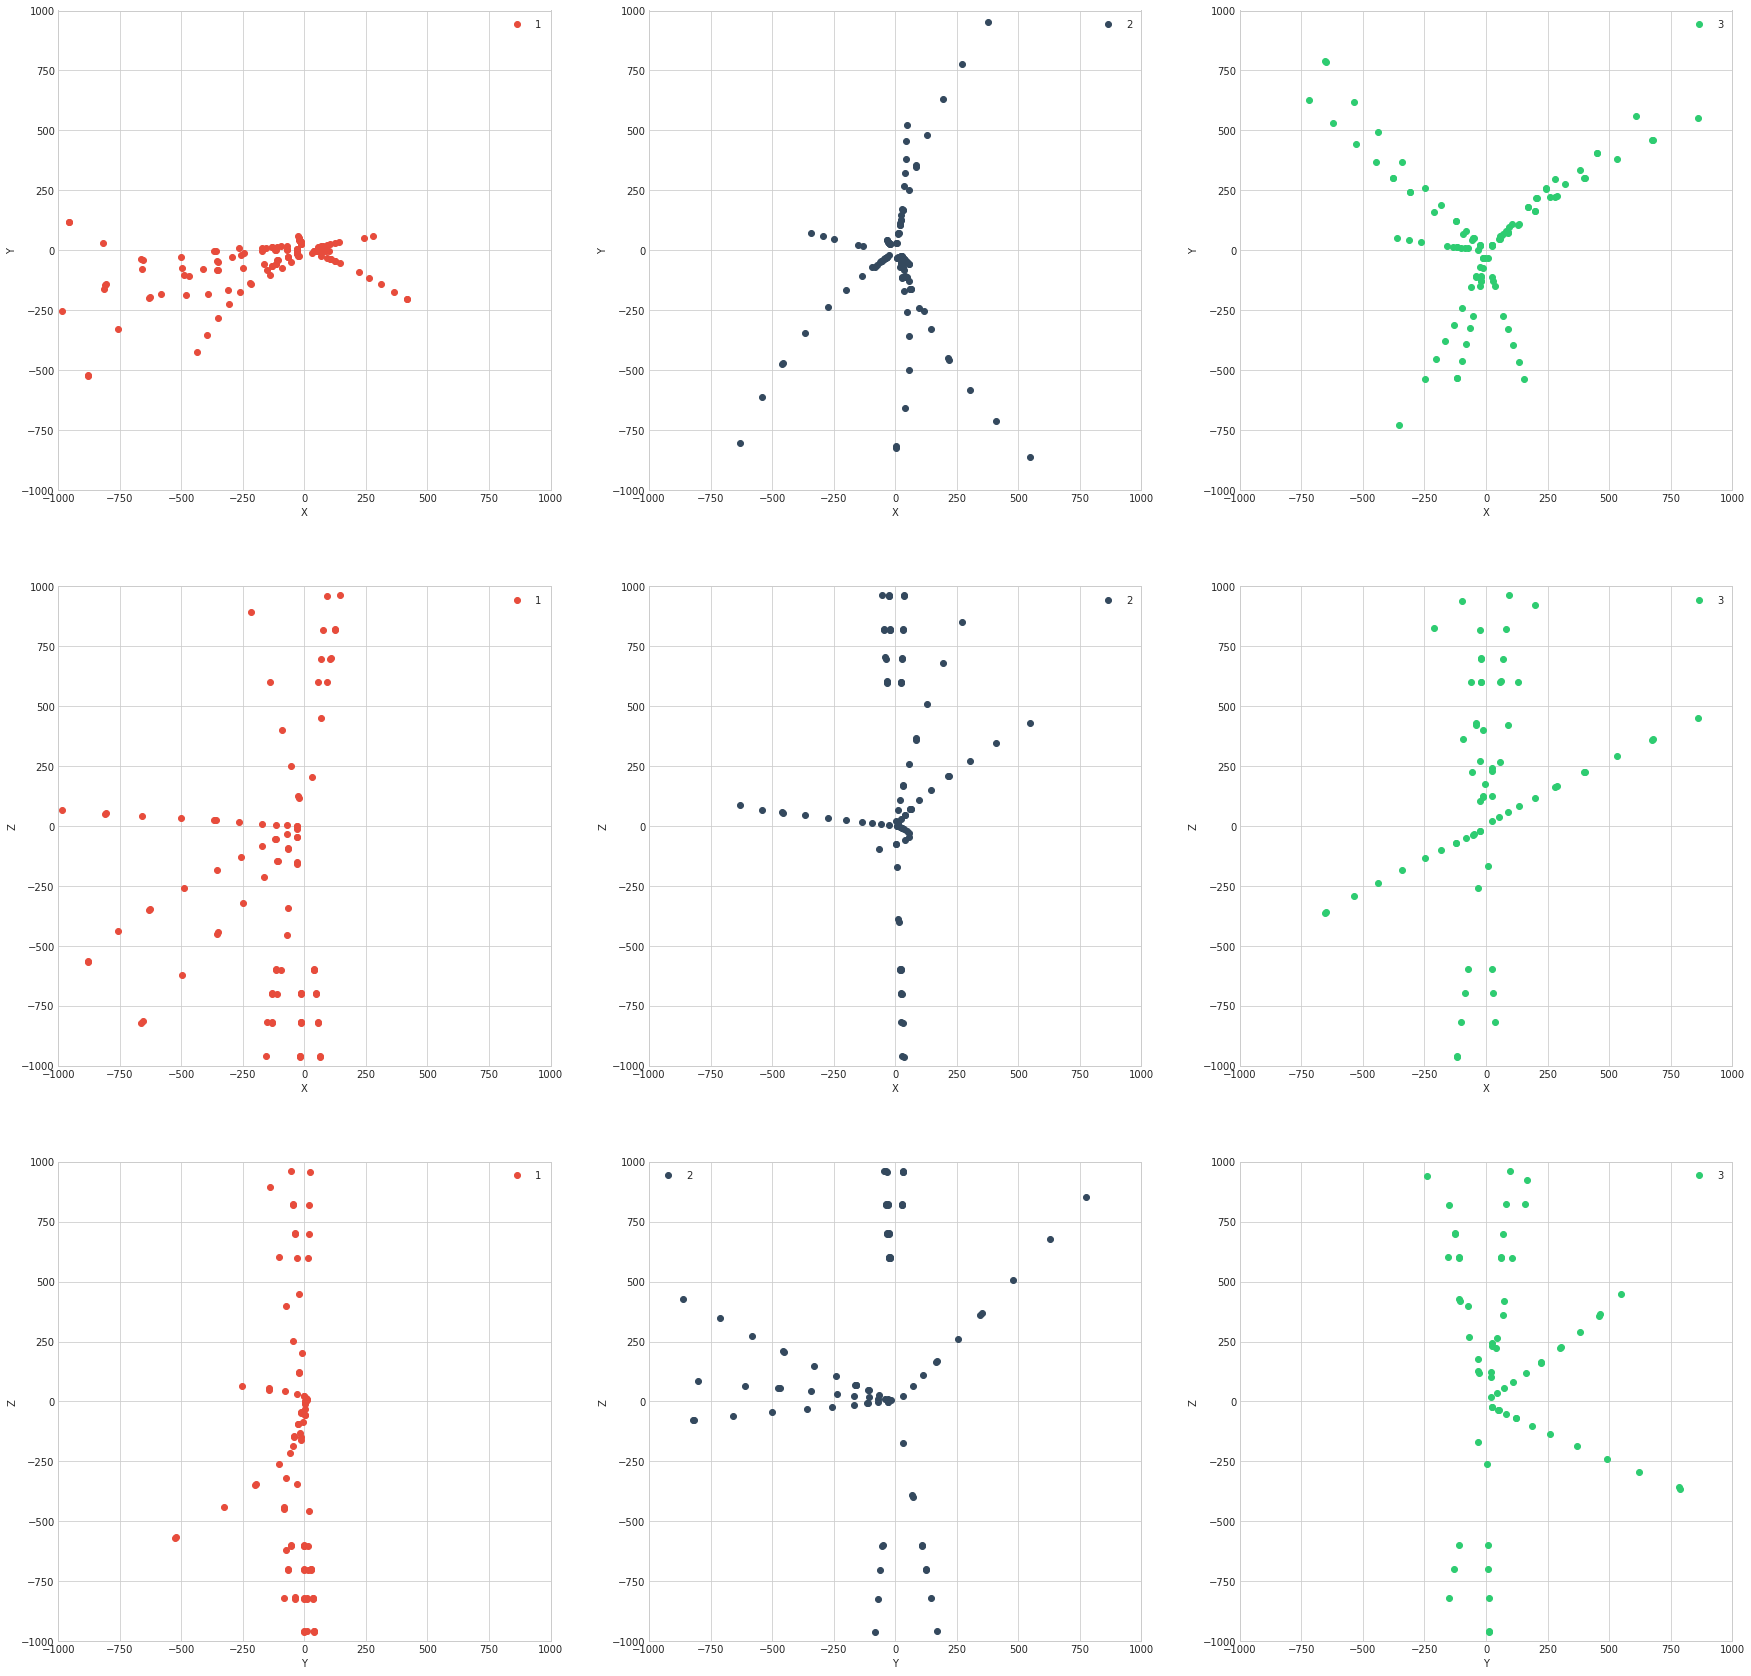

In [135]:
# Plot some tracks for every score bin
N_viz = 10
bin_1 = data_score[data_score.score_bin == 1].sample(N_viz)
bin_2 = data_score[data_score.score_bin == 2].sample(N_viz)
bin_3 = data_score[data_score.score_bin == 3].sample(N_viz)
subset = pd.concat([bin_1, bin_2, bin_3])

fig = plt.figure(figsize=(30,30))
colors = ["#e74c3c", "#34495e", "#2ecc71"]

plt.subplot(3,3,1)
t1 = pd.DataFrame()
for particle_id in bin_1.particle_id.unique():
    t1 = pd.concat([t1, data_score[data_score.particle_id == particle_id]])
plt.plot(t1.x, t1.y, "o", label="1", color=colors[0])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,2)
t2 = pd.DataFrame()
for particle_id in bin_2.particle_id.unique():
    t2 = pd.concat([t2, data_score[data_score.particle_id == particle_id]])
plt.plot(t2.x, t2.y, "o", label="2", color=colors[1])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,3)
t3 = pd.DataFrame()
for particle_id in bin_3.particle_id.unique():
    t3 = pd.concat([t3, data_score[data_score.particle_id == particle_id]])
plt.plot(t3.x, t3.y, "o", label="3", color=colors[2])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,4)
t1 = pd.DataFrame()
for particle_id in bin_1.particle_id.unique():
    t1 = pd.concat([t1, data_score[data_score.particle_id == particle_id]])
plt.plot(t1.x, t1.z, "o", label="1", color=colors[0])
plt.xlabel("X")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,5)
t2 = pd.DataFrame()
for particle_id in bin_2.particle_id.unique():
    t2 = pd.concat([t2, data_score[data_score.particle_id == particle_id]])
plt.plot(t2.x, t2.z, "o", label="2", color=colors[1])
plt.xlabel("X")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,6)
t3 = pd.DataFrame()
for particle_id in bin_3.particle_id.unique():
    t3 = pd.concat([t3, data_score[data_score.particle_id == particle_id]])
plt.plot(t3.x, t3.z, "o", label="3", color=colors[2])
plt.xlabel("X")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,7)
t1 = pd.DataFrame()
for particle_id in bin_1.particle_id.unique():
    t1 = pd.concat([t1, data_score[data_score.particle_id == particle_id]])
plt.plot(t1.y, t1.z, "o", label="1", color=colors[0])
plt.xlabel("Y")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,8)
t2 = pd.DataFrame()
for particle_id in bin_2.particle_id.unique():
    t2 = pd.concat([t2, data_score[data_score.particle_id == particle_id]])
plt.plot(t2.y, t2.z, "o", label="2", color=colors[1])
plt.xlabel("Y")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.subplot(3,3,9)
t3 = pd.DataFrame()
for particle_id in bin_3.particle_id.unique():
    t3 = pd.concat([t3, data_score[data_score.particle_id == particle_id]])
plt.plot(t3.y, t3.z, "o", label="3", color=colors[2])
plt.xlabel("Y")
plt.ylabel("Z")
plt.legend()
plt.ylim((-1000,1000))
plt.xlim((-1000,1000))

plt.show()